# Assignment 2

In [1]:
from lib.linalg import (
    Cholesky,
    GaussSeidel,
    GaussJordan,
    LUSolve,
    ConjugateGradient,
    # conjugate_gradient,
    inverse_conjugate_gradient,
    inverse_conjugate_gradient_no_matrix,
)
from lib.array import Array, zeros
from lib.matrix import Matrix

### Question 1

#### Using Cholesky

In [2]:
A = [
    [4, -1, 0, -1, 0, 0],
    [-1, 4, -1, 0, -1, 0],
    [0, -1, 4, 0, 0, -1],
    [-1, 0, 0, 4, -1, 0],
    [0, -1, 0, -1, 4, -1],
    [0, 0, -1, 0, -1, 4],
]
b = [2, 1, 2, 2, 1, 2]
matrix = Matrix.from_list(A)
print(f"Matrix A: \n{matrix}")
# Initialize the Cholesky solver
sol = Cholesky(matrix, b)
sol.decompose()
x = sol.solve()
print(f"Decomposed matrix L: \n{sol.L}")
print(f"Solution vector b: \n{x}")

Matrix A: 
       4.0       -1.0        0.0       -1.0        0.0        0.0
      -1.0        4.0       -1.0        0.0       -1.0        0.0
       0.0       -1.0        4.0        0.0        0.0       -1.0
      -1.0        0.0        0.0        4.0       -1.0        0.0
       0.0       -1.0        0.0       -1.0        4.0       -1.0
       0.0        0.0       -1.0        0.0       -1.0        4.0
Decomposed matrix L: 
       2.0       -0.5        0.0       -0.5        0.0        0.0
      -0.5    1.93649    -0.5164    -0.1291    -0.5164        0.0
       0.0    -0.5164    1.93218    -0.0345   -0.13801   -0.51755
      -0.5    -0.1291    -0.0345    1.93188   -0.55461   -0.00924
       0.0    -0.5164   -0.13801   -0.55461    1.84572   -0.58327
       0.0        0.0   -0.51755   -0.00924   -0.58327     1.8417
Solution vector b: 
([1.0, 1.0, 1.0, 1.0, 1.0, 1.0], double)


#### Using Gauss-Seidel

In [3]:
A = [
    [4, -1, 0, -1, 0, 0],
    [-1, 4, -1, 0, -1, 0],
    [0, -1, 4, 0, 0, -1],
    [-1, 0, 0, 4, -1, 0],
    [0, -1, 0, -1, 4, -1],
    [0, 0, -1, 0, -1, 4],
]
b = Array("d", [2, 1, 2, 2, 1, 2])
matrix = Matrix.from_list(A)
print(f"Matrix A: \n{matrix}")

# Initialize the Gauss-Seidel solver
sol = GaussSeidel(matrix, b, tol=1e-6)
x = sol.solve()
print(f"Solution vector x: \n{x}")

Matrix A: 
       4.0       -1.0        0.0       -1.0        0.0        0.0
      -1.0        4.0       -1.0        0.0       -1.0        0.0
       0.0       -1.0        4.0        0.0        0.0       -1.0
      -1.0        0.0        0.0        4.0       -1.0        0.0
       0.0       -1.0        0.0       -1.0        4.0       -1.0
       0.0        0.0       -1.0        0.0       -1.0        4.0
Solution vector x: 
([1.0, 1.0, 1.0, 1.0, 1.0, 1.0], double)


### Question 2

In [4]:
A = [
    [0, 4, 2, 0, 1],
    [4, 0, 4, 10, 1],
    [2, 5, 1, 3, 13],
    [11, 3, 0, 1, 2],
    [3, 2, 7, 1, 0],
]
b = Array("d", [20, 15, 92, 51, 15])

#### Using Gauss-Jordan

In [5]:
matrix = Matrix.from_list(A)
print(f"Matrix A: \n{matrix}")
sol = GaussJordan(matrix, b)

x = sol.solve()

print(f"Solution vector x: \n{x}")

Matrix A: 
       0.0        4.0        2.0        0.0        1.0
       4.0        0.0        4.0       10.0        1.0
       2.0        5.0        1.0        3.0       13.0
      11.0        3.0        0.0        1.0        2.0
       3.0        2.0        7.0        1.0        0.0
Solution vector x: 
([2.6746, 3.71189, -0.05331, -0.07443, 5.25907], double)


#### Using LU-decomposition (Doolitle)

In [6]:
matrix = Matrix.from_list(A)
print(f"Matrix A: \n{matrix}")

# Initialize the LU solver
sol = LUSolve(matrix, b, method="doolittle")
x = sol.solve()

print(f"Solution vector x: \n{x}")

Matrix A: 
       0.0        4.0        2.0        0.0        1.0
       4.0        0.0        4.0       10.0        1.0
       2.0        5.0        1.0        3.0       13.0
      11.0        3.0        0.0        1.0        2.0
       3.0        2.0        7.0        1.0        0.0
Solution vector x: 
([2.6746, 3.71189, -0.05331, -0.07443, 5.25907], double)


### Question 3

In [7]:
A = [
    [2, -3, 0, 0, 0, 0],
    [-1, 4, -1, 0, -1, 0],
    [0, -1, 4, 0, 0, -1],
    [0, 0, 0, 2, -3, 0],
    [0, -1, 0, -1, 4, -1],
    [0, 0, -1, 0, -1, 4],
]

A = Matrix.from_list(A)

b = Array("d", [-5/3, 2/3, 3, -4/3, -1/3, 5/3])

sol = ConjugateGradient(A, b)

sol, _ = sol.solve()

print(f"Solution vector x: \n{round(sol.x0, 5)}")

Solution vector x: 
([-0.33334, 0.33333, 1.0, -0.66667, -0.0, 0.66667], double)


In [8]:
# A = [
#     [2, -3, 0, 0, 0, 0],
#     [-1, 4, -1, 0, -1, 0],
#     [0, -1, 4, 0, 0, -1],
#     [0, 0, 0, 2, -3, 0],
#     [0, -1, 0, -1, 4, -1],
#     [0, 0, -1, 0, -1, 4],
# ]

# A = Matrix.from_list(A)

# b = Array("d", [-5/3, 2/3, 3, -4/3, -1/3, 5/3])

# x, res = conjugate_gradient(A, b)

# print(f"Conjugate Gradient solution: \n{round(x, 10)}")

# # Verifies the solution
# assert round(A * x, 2) == round(b, 2)

In [9]:
A_inv = inverse_conjugate_gradient(A)

print(f"Inverse Conjugate Gradient solution: \n{A_inv}")

# Verifies the solution
print(f"Solution: \n{round(A * A_inv, 2)}")

print(f"Identity: \n{Matrix.identity(6)}")


# Verifies the solution
tol = 1e-4
for i in range(6):
    for j in range(6):
        if i == j:
            try:
                assert abs(A * A_inv - Matrix.identity(6))[i][j] < tol
            except AssertionError:
                print(f"AssertionError: {abs(A * A_inv - Matrix.identity(6))[i][j]}")
        else:
            try:
                assert abs(A * A_inv - Matrix.identity(6))[i][j] < tol
            except AssertionError:
                print(f"AssertionError: {abs(A * A_inv - Matrix.identity(6))[i][j]}")

Inverse Conjugate Gradient solution: 
   0.93507    0.87013    0.25974     0.2078    0.41559    0.16883
   0.29004    0.58009    0.17316    0.13853    0.27706    0.11255
   0.08658    0.17316    0.32035    0.05627    0.11255    0.10822
    0.2078    0.41559    0.16883    0.93507    0.87013    0.25974
   0.13853    0.27706    0.11255    0.29004    0.58009    0.17316
   0.05627    0.11255    0.10822    0.08658    0.17316    0.32035
Solution: 
       1.0       -0.0        0.0        0.0        0.0        0.0
      -0.0        1.0       -0.0        0.0        0.0       -0.0
       0.0        0.0        1.0       -0.0       -0.0       -0.0
       0.0        0.0        0.0        1.0       -0.0        0.0
       0.0        0.0       -0.0       -0.0        1.0        0.0
      -0.0       -0.0       -0.0        0.0        0.0        1.0
Identity: 
       1.0        0.0        0.0        0.0        0.0        0.0
       0.0        1.0        0.0        0.0        0.0        0.0
       0.0      

### Question 4

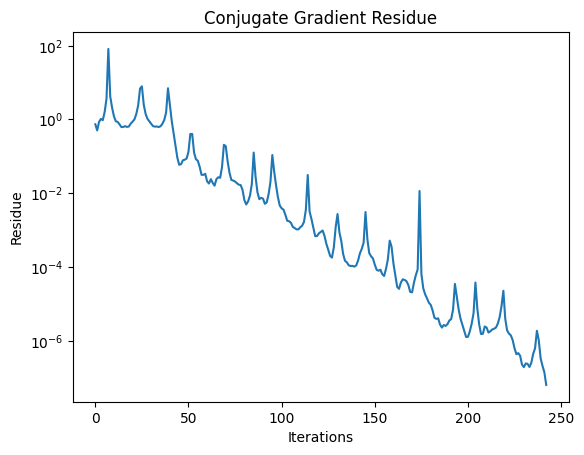

Inverse Conjugate Gradient solution: 
   3.38855    4.25301    4.77723    4.91927    4.66776    4.04284    3.09449    1.89858    0.55078   -0.84108   -2.16565   -3.31697   -4.20293   -4.75266   -4.92218   -4.69792   -4.09783   -3.16991    -1.9884   -0.64782    0.74459    2.07743    3.24408     4.1512    4.72622    4.92315    4.72622     4.1512    3.24408    2.07743    0.74459   -0.64782    -1.9884   -3.16991   -4.09783   -4.69792   -4.92218   -4.75266   -4.20293   -3.31697   -2.16565   -0.84108    0.55078    1.89858    3.09449    4.04284    4.66776    4.91927    4.77723    4.25301
   4.25301    3.38855    4.25301    4.77723    4.91927    4.66776    4.04284    3.09449    1.89858    0.55078   -0.84108   -2.16565   -3.31697   -4.20293   -4.75266   -4.92218   -4.69792   -4.09783   -3.16991    -1.9884   -0.64782    0.74459    2.07743    3.24408     4.1512    4.72622    4.92315    4.72622     4.1512    3.24408    2.07743    0.74459   -0.64782    -1.9884   -3.16991   -4.09783   -4.69792   -4.

In [10]:
# Matrix generating function

def matrix_generator(x: Array, m = 0.2):
    y = zeros("d", x.length)
    for i in range(x.length):
        if i == x.length - 1:
            y[i] = 0.5 * (x[0] + x[i-1] - 2*x[i]) + m**2*x[i]
        else:
            y[i] = 0.5 * (x[i+1] + x[i-1] - 2*x[i]) + m**2*x[i]
    
    return y

inv, residue = inverse_conjugate_gradient_no_matrix(
    matrix_generator, n=50, tol=1e-7,
)
# sol = ConjugateGradient(matrix_generator, Array.zeros("d", 50))
# sol, vals, res = sol.solve()

# Verifies the solution
print(f"Inverse Conjugate Gradient solution: \n{inv}")


print(f"Residue: \n{residue}")

